In [1]:
# Implement K-Means clustering on Iris.csv dataset. Determine the number of clusters using the elbow method.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [2]:
iris = pd.read_csv('Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [4]:
iris.shape

(150, 6)

In [5]:
# Exclude the first column (id) and the last column (species)
X = iris.iloc[:, 1:5]
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [7]:
# Determine the optimal number of clusters using the elbow method

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    print(f'WCSS for {i} clusters: {wcss[-1]}')

WCSS for 1 clusters: 600.0
WCSS for 2 clusters: 223.73200573676345
WCSS for 3 clusters: 140.96581663074699
WCSS for 4 clusters: 114.61550694959807
WCSS for 5 clusters: 91.19197002146464
WCSS for 6 clusters: 80.23060704506958
WCSS for 7 clusters: 71.80147182347547
WCSS for 8 clusters: 63.01282906393716
WCSS for 9 clusters: 55.42759219362284
WCSS for 10 clusters: 47.70295211830704


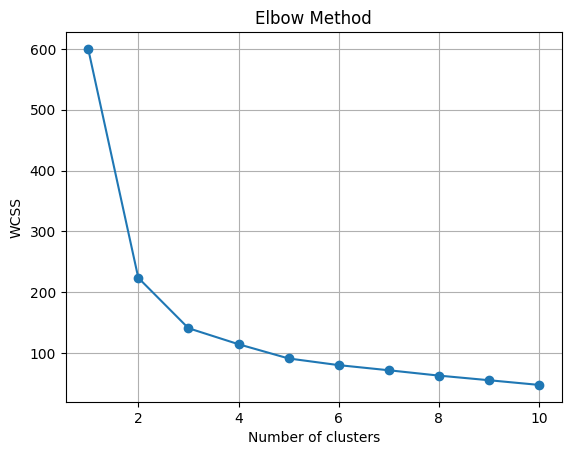

In [8]:
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [9]:
optimal_k = 3
kmeans = KMeans(
    n_clusters=optimal_k, 
    init='k-means++', 
    max_iter=300, 
    n_init=10, 
    random_state=0
)
kmeans.fit(X_scaled)

KMeans(n_clusters=3, n_init=10, random_state=0)

In [10]:
# Add cluster labels to the original data
iris['Cluster'] = kmeans.labels_
print(iris.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species  \
0   1            5.1           3.5            1.4           0.2  Iris-setosa   
1   2            4.9           3.0            1.4           0.2  Iris-setosa   
2   3            4.7           3.2            1.3           0.2  Iris-setosa   
3   4            4.6           3.1            1.5           0.2  Iris-setosa   
4   5            5.0           3.6            1.4           0.2  Iris-setosa   

   Cluster  
0        1  
1        1  
2        1  
3        1  
4        1  


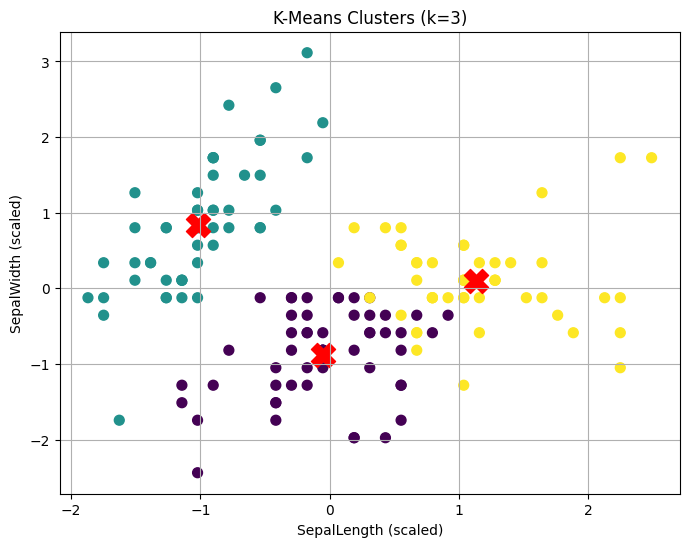

In [11]:
# Visualize the clusters
plt.figure(figsize=(8,6))
plt.scatter(
    X_scaled.iloc[:, 0], X_scaled.iloc[:, 1], 
    c=iris['Cluster'], cmap='viridis', s=50
)
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
    marker='X', s=300, c='red', linewidths=1
)
plt.xlabel('SepalLength (scaled)')
plt.ylabel('SepalWidth (scaled)')
plt.title(f'K-Means Clusters (k={optimal_k})')
plt.grid()
plt.show()

In [12]:
# Map clusters to species for comparison (useful for analysis)
species_map = {0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}
iris['Species_Label'] = iris['Species']  # Original label
print(pd.crosstab(iris['Cluster'], iris['Species_Label']))

Species_Label  Iris-setosa  Iris-versicolor  Iris-virginica
Cluster                                                    
0                        0               39              14
1                       50                0               0
2                        0               11              36


In [13]:
# split data for model training
X = X_scaled
y = iris['Cluster']

In [14]:
#train model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.93
